# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Visualize Bird Species](#3)
- [4. Data Preprocessing](#4)
- [5. Spliting the data into Training and Testing Data](#5)
- [6. Normalization](#6)
- [7. Label Binarizer](#7)
- [8. ANN](#8)
- [9. CNN](#9)
- [10. Evaluation](#10)

# Project Description

Bird Species Classification<br>
In this project, I will create a model which will be able to predict species of the bird.<br>
this is multiclass classification problem, the classes in the data:<br><br>
**1 - American Goldfinch**<br><br>
<img src = 'Data/Bird Speciees Dataset/AMERICAN GOLDFINCH/001.jpg'><br><br>
**2 - Barn Owl**<br><br>
<img src = 'Data/Bird Speciees Dataset/BARN OWL/002.jpg'><br><br>
**3 - Carmine Bee-Eater**<br><br>
<img src = 'Data/Bird Speciees Dataset/CARMINE BEE-EATER/003.jpg'><br><br>
**4 - Downy Woodpecker**<br><br>
<img src = 'Data/Bird Speciees Dataset/DOWNY WOODPECKER/001.jpg'><br><br>
**5 - Emperor Penguin**<br><br>
<img src = 'Data/Bird Speciees Dataset/EMPEROR PENGUIN/001.jpg'><br><br>
**6 - Flamingo**<br><br>
<img src = 'Data/Bird Speciees Dataset/FLAMINGO/001.jpg'><br><br>

# Import Necessaries Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.image import imread
import seaborn as sns
import cv2
import random
from os import listdir

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import  LabelBinarizer

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

In [29]:
path = "Data/Bird Speciees Dataset/AMERICAN GOLDFINCH"

In [30]:
listdir(path)

['001.jpg',
 '002.jpg',
 '003.jpg',
 '004.jpg',
 '005.jpg',
 '006.jpg',
 '007.jpg',
 '008.jpg',
 '009.jpg',
 '010.jpg',
 '011.jpg',
 '012.jpg',
 '013.jpg',
 '014.jpg',
 '015.jpg',
 '016.jpg',
 '017.jpg',
 '018.jpg',
 '019.jpg',
 '020.jpg',
 '021.jpg',
 '022.jpg',
 '023.jpg',
 '024.jpg',
 '025.jpg',
 '026.jpg',
 '027.jpg',
 '028.jpg',
 '029.jpg',
 '030.jpg',
 '031.jpg',
 '032.jpg',
 '033.jpg',
 '034.jpg',
 '035.jpg',
 '036.jpg',
 '037.jpg',
 '038.jpg',
 '039.jpg',
 '040.jpg',
 '041.jpg',
 '042.jpg',
 '043.jpg',
 '044.jpg',
 '045.jpg',
 '046.jpg',
 '047.jpg',
 '048.jpg',
 '049.jpg',
 '050.jpg',
 '051.jpg',
 '052.jpg',
 '053.jpg',
 '054.jpg',
 '055.jpg',
 '056.jpg',
 '057.jpg',
 '058.jpg',
 '059.jpg',
 '060.jpg',
 '061.jpg',
 '062.jpg',
 '063.jpg',
 '064.jpg',
 '065.jpg',
 '066.jpg',
 '067.jpg',
 '068.jpg',
 '069.jpg',
 '070.jpg',
 '071.jpg',
 '072.jpg',
 '073.jpg',
 '074.jpg',
 '075.jpg',
 '076.jpg',
 '077.jpg',
 '078.jpg',
 '079.jpg',
 '080.jpg',
 '081.jpg',
 '082.jpg',
 '083.jpg',
 '08

<a id='3'></a>
# Visualize Bird Species

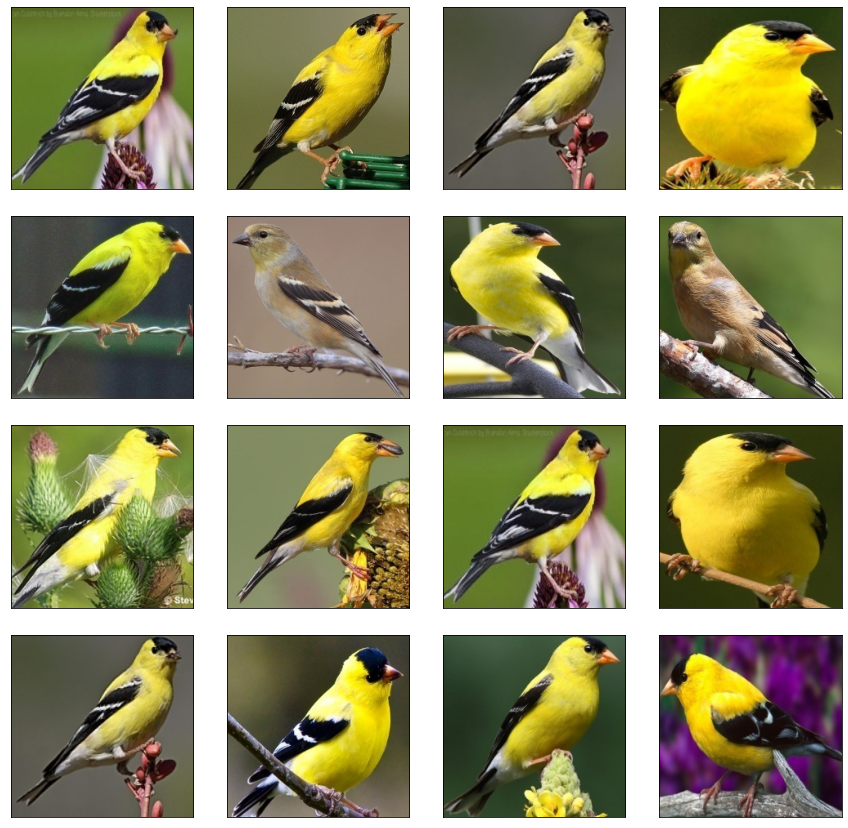

In [31]:
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/AMERICAN GOLDFINCH"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

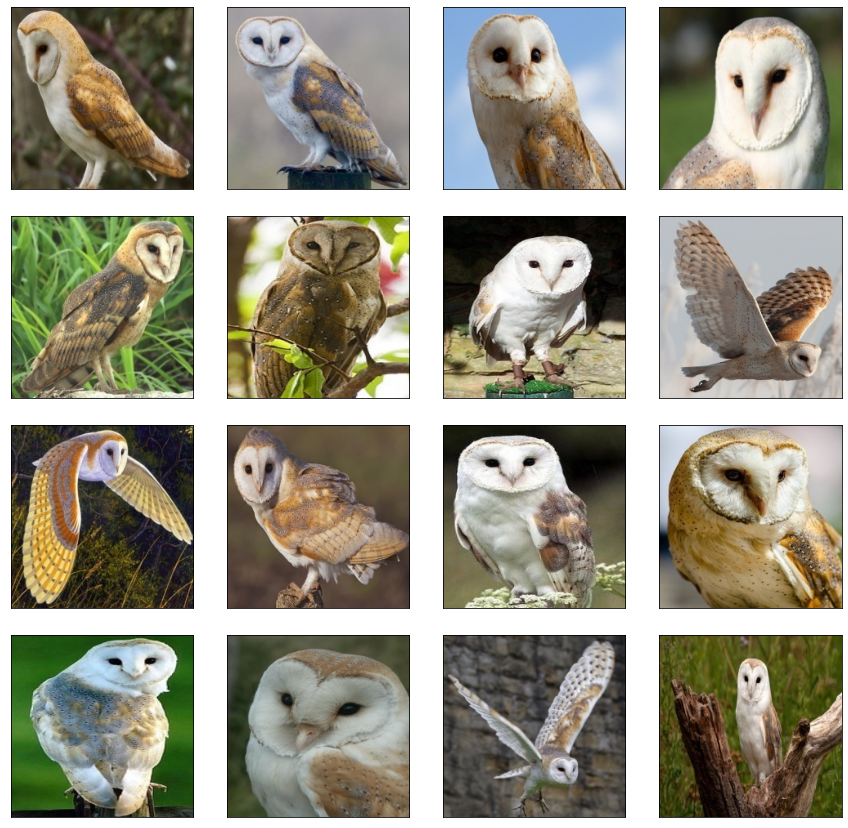

In [32]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/BARN OWL"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

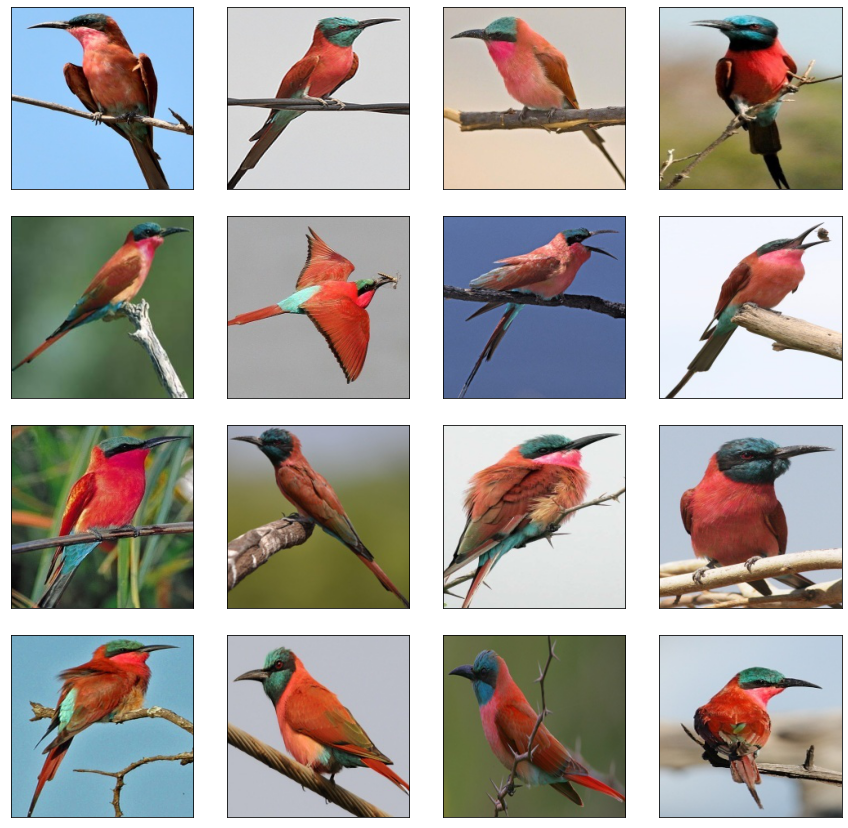

In [33]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/CARMINE BEE-EATER"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

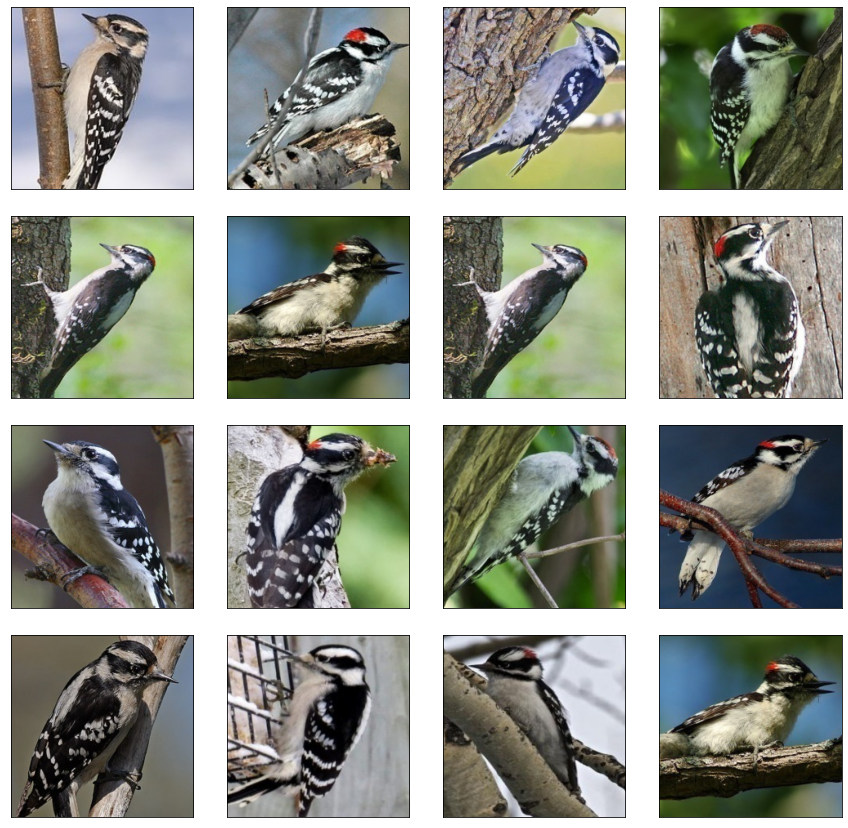

In [34]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/DOWNY WOODPECKER"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

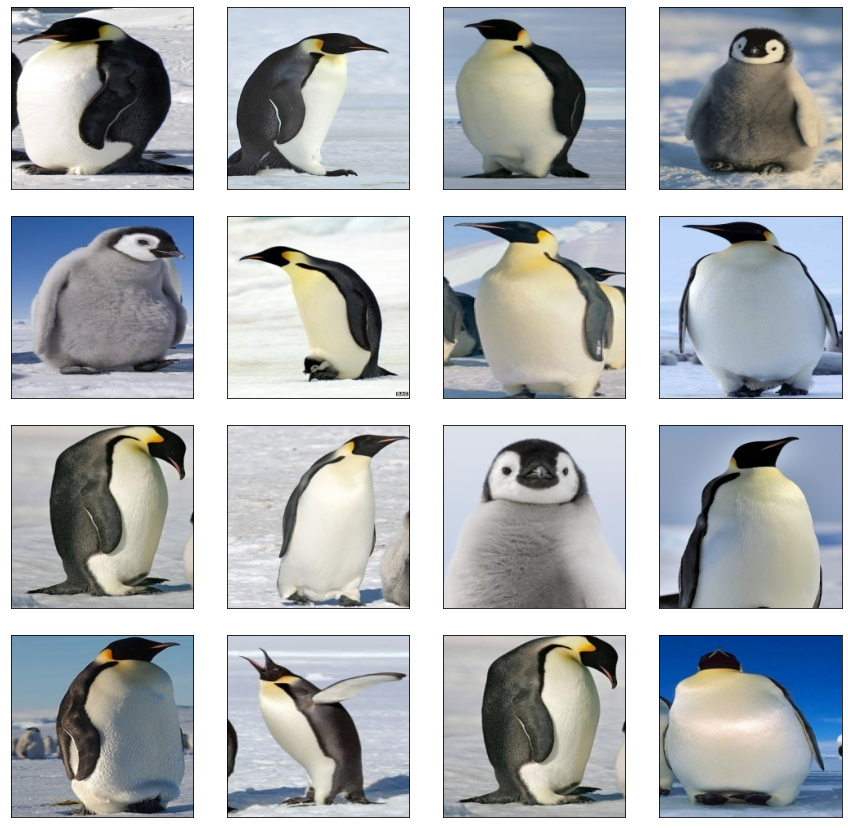

In [35]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/EMPEROR PENGUIN"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

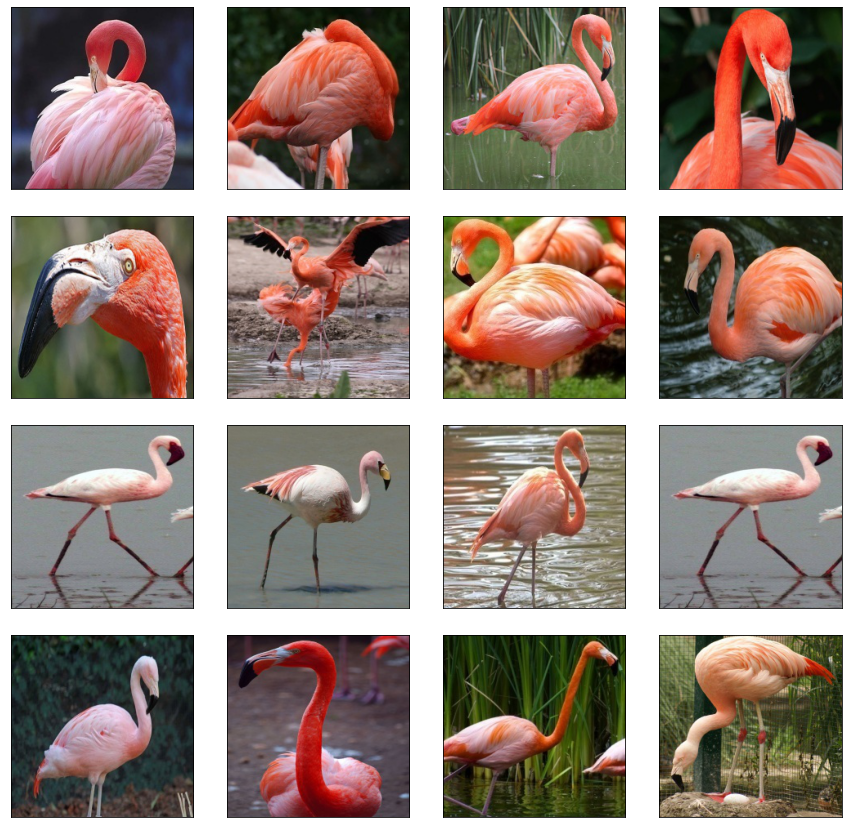

In [36]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/FLAMINGO"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

<a id='4'></a>
# Data Preprocessing

In [37]:
# Setting path and creating empty list
dir = "Data/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [38]:
root_dir

['AMERICAN GOLDFINCH',
 'BARN OWL',
 'CARMINE BEE-EATER',
 'DOWNY WOODPECKER',
 'EMPEROR PENGUIN',
 'FLAMINGO']

In [39]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [40]:
image_list[0]

array([[[ 93., 109., 116.],
        [ 94., 110., 117.],
        [ 95., 111., 118.],
        ...,
        [ 96., 111., 120.],
        [ 96., 112., 119.],
        [ 98., 114., 121.]],

       [[ 93., 109., 116.],
        [ 94., 110., 117.],
        [ 94., 110., 117.],
        ...,
        [ 94., 109., 118.],
        [ 95., 111., 118.],
        [ 96., 112., 119.]],

       [[ 93., 108., 117.],
        [ 94., 109., 118.],
        [ 93., 108., 117.],
        ...,
        [ 97., 112., 121.],
        [ 98., 114., 121.],
        [ 99., 115., 122.]],

       ...,

       [[ 78.,  94.,  93.],
        [ 77.,  93.,  92.],
        [ 76.,  91.,  93.],
        ...,
        [153., 156., 161.],
        [153., 156., 161.],
        [153., 156., 161.]],

       [[ 83.,  97.,  96.],
        [ 81.,  95.,  94.],
        [ 77.,  92.,  94.],
        ...,
        [153., 156., 160.],
        [153., 156., 160.],
        [152., 155., 159.]],

       [[ 84.,  98.,  97.],
        [ 82.,  96.,  95.],
        [ 77.,  

In [41]:
label_list[0:4]

['AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH']

In [42]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [43]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

6

In [44]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

In [45]:
# Checking labels shape 
label_list = np.array(label_list)
label_list.shape

(811,)

<a id='5'></a>
# Spliting the data into Training and Testing 

In [46]:
# Splitting dataset
x_train, x_val, y_train, y_val = train_test_split(image_list, label_list, test_size=0.2, random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state = 0) 

In [47]:
print(f"Number of Training dataset: {len(x_train)}\nNumber of Validation dataset: {len(x_val)}\nNumber of Testing dataset: {len(x_test)}")

Number of Training dataset: 518
Number of Validation dataset: 163
Number of Testing dataset: 130


<a id='6'></a>
# Normalization and Reshaping

In [48]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_val = np.array(x_val, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0

x_train = x_train.reshape( -1, 224,224,3) 
x_val = x_val.reshape( -1, 224,224,3) 
x_test = x_test.reshape( -1, 224,224,3) 

In [49]:
x_train[0]

array([[[0.929 , 0.8823, 0.8354],
        [0.9253, 0.8784, 0.8315],
        [0.9253, 0.8784, 0.8315],
        ...,
        [0.9136, 0.8667, 0.82  ],
        [0.9136, 0.8667, 0.82  ],
        [0.9136, 0.8667, 0.82  ]],

       [[0.929 , 0.8823, 0.8354],
        [0.9253, 0.8784, 0.8315],
        [0.9253, 0.8784, 0.8315],
        ...,
        [0.9136, 0.8667, 0.82  ],
        [0.9136, 0.8667, 0.82  ],
        [0.9136, 0.8667, 0.82  ]],

       [[0.929 , 0.8823, 0.8354],
        [0.9253, 0.8784, 0.8315],
        [0.9253, 0.8784, 0.8315],
        ...,
        [0.9136, 0.8667, 0.82  ],
        [0.9136, 0.8667, 0.82  ],
        [0.9136, 0.8667, 0.82  ]],

       ...,

       [[0.651 , 0.792 , 0.863 ],
        [0.647 , 0.788 , 0.859 ],
        [0.647 , 0.788 , 0.859 ],
        ...,
        [0.4941, 0.6626, 0.698 ],
        [0.506 , 0.6665, 0.702 ],
        [0.506 , 0.6665, 0.702 ]],

       [[0.639 , 0.792 , 0.851 ],
        [0.639 , 0.792 , 0.851 ],
        [0.639 , 0.792 , 0.851 ],
        .

<a id='7'></a>
# Label Binarizing

In [50]:
# Label binarizing to one hot encode the target variables
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [51]:
y_train

array([[0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0]])

In [52]:
y_train.shape

(518, 6)

<a id='8'></a>
# ANN

**Build and Train ANN**

In [53]:
def load_model(): 
    model = Sequential([
        Flatten(input_shape=(224,224,3)),
        Dense(512, activation ='relu'),
        Dense(256, activation ='relu'),
        Dense(128, activation ='relu'),
        Dense(num_classes, activation='softmax'),
    ])
    model.compile(
        optimizer= Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['acc'],
    )
    return model
    
    
early_stopping = callbacks.EarlyStopping(
        patience=10,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
        baseline=None,
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

ann_model = load_model()
history_ann = ann_model.fit(  x_train , y_train,
                validation_data = (x_val , y_val),
                epochs = 1000,
                callbacks = [early_stopping , plateau],
              )

Epoch 1/1000
17/17 [==============================] - ETA: 0s - loss: 35.6513 - acc: 0.1969

ValueError: in user code:

    File "C:\Users\eyada\Anaconda3\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\eyada\Anaconda3\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\eyada\Anaconda3\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\eyada\Anaconda3\lib\site-packages\keras\engine\training.py", line 1305, in test_step
        self.compiled_loss(
    File "C:\Users\eyada\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\eyada\Anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\eyada\Anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\eyada\Anaconda3\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\eyada\Anaconda3\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


**loss curve**

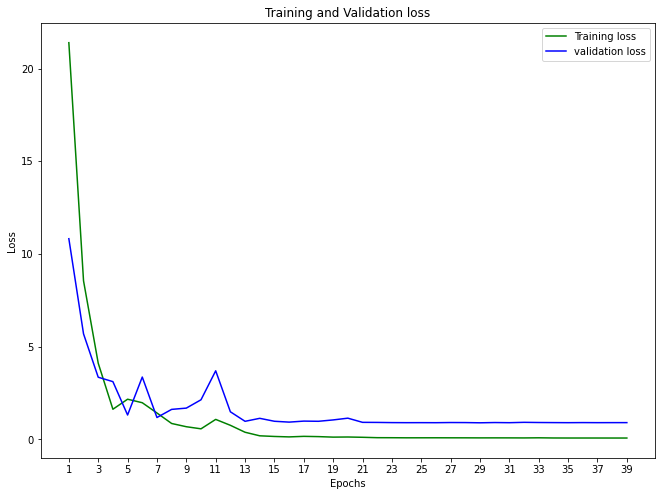

In [87]:
plt.figure(figsize=(11,8))
loss_train = history_ann.history['loss']
loss_val = history_ann.history['val_loss']
epochs = range(1,40)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(1,40,2))
plt.legend()
plt.show()

**Acc curve**

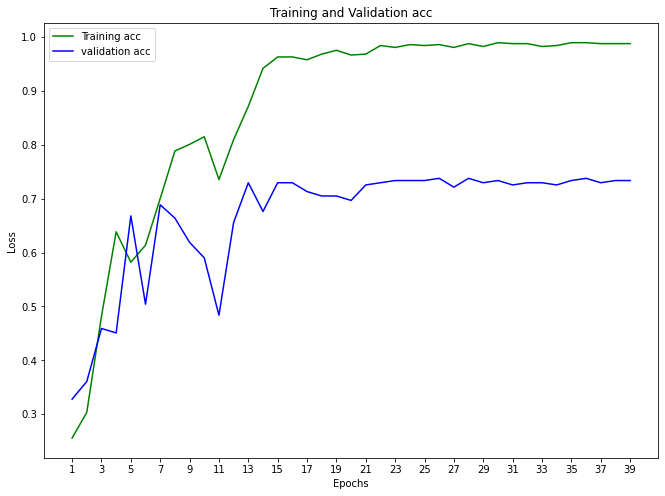

In [88]:
plt.figure(figsize=(11,8))
loss_train = history_ann.history['acc']
loss_val = history_ann.history['val_acc']
epochs = range(1,40)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(1,40,2))
plt.legend()
plt.show()

<a id='9'></a>
# CNN

In [27]:
def load_model():
    model = Sequential([
        Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(16, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation ='relu'),
        Dense(num_classes, activation="softmax")    
    ])
    model.compile(
        Adam(learning_rate=0.0005),
        loss = 'categorical_crossentropy',
        metrics = ['acc']
    )
    return model

early_stopping = callbacks.EarlyStopping(
        patience=10,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

nn_model = load_model()
history = nn_model.fit(  x_train , y_train,
                validation_data = (x_val , y_val),
                epochs = 1000,
                callbacks = [early_stopping , plateau],
              )

Epoch 1/1000
17/17 [==============================] - ETA: 0s - loss: 1.7194 - acc: 0.2799

ValueError: Data cardinality is ambiguous:
  x sizes: 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224
  y sizes: 163
Make sure all arrays contain the same number of samples.

**Loss Curve**

In [ ]:
nn_model.save('bird_Species.h5')

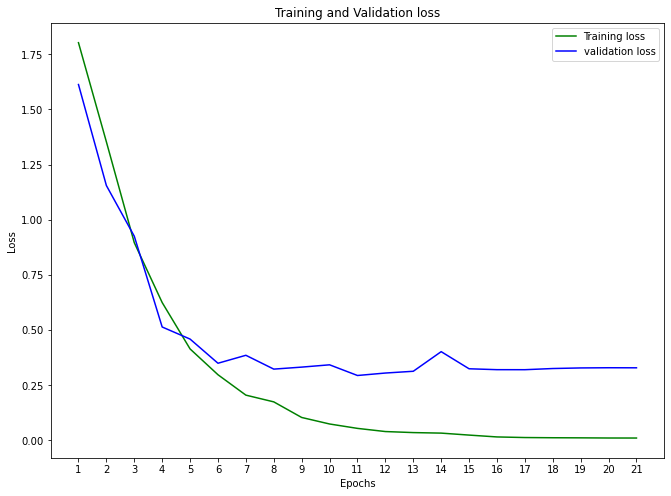

In [81]:
plt.figure(figsize=(11,8))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,29)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(1,22))
plt.legend()
plt.show()

**ACC Curve**

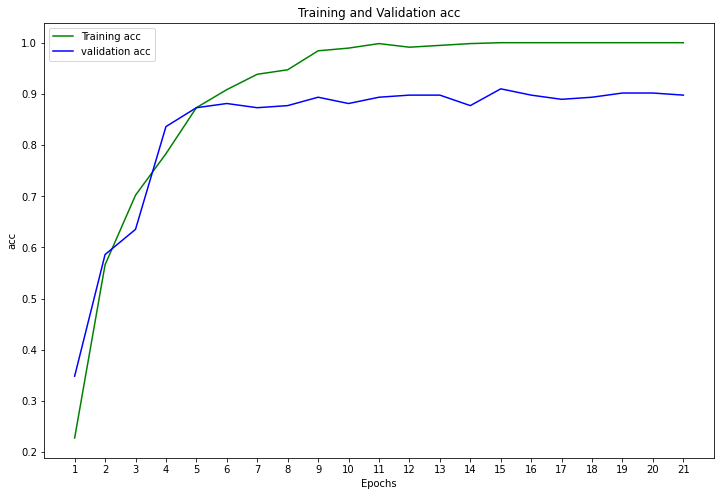

In [82]:
#Plot the Accuarcy history
plt.figure(figsize=(12,8))
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,22)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.xticks(np.arange(1,22))
plt.legend()
plt.show()

In [89]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.3, random_state = 0) 

In [90]:
y_test.shape

(244,)

In [ ]:
y_pred = nn_model.predict(x_test)

In [96]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [97]:
y_predicted_labels = np.array(y_predicted_labels)
y_predicted_labels.shape

(244,)

In [101]:
y_predicted_labels

array([4, 1, 0, 3, 0, 0, 3, 3, 0, 5, 4, 3, 0, 1, 5, 5, 3, 0, 0, 1, 5, 3,
       0, 3, 4, 2, 4, 5, 0, 4, 1, 0, 1, 2, 3, 2, 5, 5, 2, 4, 2, 3, 0, 4,
       4, 5, 4, 4, 0, 1, 3, 1, 2, 3, 5, 1, 2, 4, 4, 3, 4, 5, 5, 3, 3, 5,
       5, 1, 1, 5, 1, 3, 2, 5, 2, 1, 5, 3, 3, 0, 0, 5, 2, 2, 0, 4, 0, 1,
       5, 1, 4, 1, 4, 1, 3, 2, 3, 4, 3, 2, 4, 3, 2, 3, 3, 2, 5, 3, 3, 3,
       4, 4, 3, 4, 4, 3, 0, 2, 1, 0, 5, 3, 2, 1, 2, 4, 0, 1, 5, 4, 0, 5,
       3, 0, 3, 0, 1, 5, 4, 4, 4, 2, 2, 0, 5, 1, 5, 4, 4, 5, 3, 1, 3, 5,
       3, 1, 3, 5, 0, 0, 3, 5, 0, 0, 1, 0, 2, 4, 1, 1, 2, 2, 0, 0, 4, 0,
       3, 4, 1, 3, 5, 1, 0, 2, 4, 5, 0, 0, 1, 1, 3, 1, 2, 1, 3, 0, 4, 2,
       5, 5, 5, 3, 4, 3, 4, 5, 4, 4, 3, 5, 0, 4, 4, 4, 4, 2, 2, 2, 5, 5,
       5, 2, 3, 1, 1, 5, 1, 0, 5, 2, 0, 0, 5, 2, 2, 0, 1, 2, 4, 0, 2, 3,
       3, 3], dtype=int64)

In [102]:
y_test

array(['EMPEROR PENGUIN', 'BARN OWL', 'AMERICAN GOLDFINCH',
       'DOWNY WOODPECKER', 'AMERICAN GOLDFINCH', 'AMERICAN GOLDFINCH',
       'DOWNY WOODPECKER', 'DOWNY WOODPECKER', 'BARN OWL', 'FLAMINGO',
       'EMPEROR PENGUIN', 'DOWNY WOODPECKER', 'AMERICAN GOLDFINCH',
       'BARN OWL', 'FLAMINGO', 'FLAMINGO', 'DOWNY WOODPECKER',
       'AMERICAN GOLDFINCH', 'AMERICAN GOLDFINCH', 'BARN OWL', 'FLAMINGO',
       'DOWNY WOODPECKER', 'AMERICAN GOLDFINCH', 'DOWNY WOODPECKER',
       'DOWNY WOODPECKER', 'FLAMINGO', 'EMPEROR PENGUIN', 'FLAMINGO',
       'AMERICAN GOLDFINCH', 'EMPEROR PENGUIN', 'BARN OWL',
       'AMERICAN GOLDFINCH', 'BARN OWL', 'CARMINE BEE-EATER',
       'DOWNY WOODPECKER', 'CARMINE BEE-EATER', 'BARN OWL', 'FLAMINGO',
       'CARMINE BEE-EATER', 'EMPEROR PENGUIN', 'CARMINE BEE-EATER',
       'EMPEROR PENGUIN', 'AMERICAN GOLDFINCH', 'DOWNY WOODPECKER',
       'EMPEROR PENGUIN', 'FLAMINGO', 'EMPEROR PENGUIN',
       'EMPEROR PENGUIN', 'AMERICAN GOLDFINCH', 'BARN OWL',
      

In [103]:
y_test = np.where(y_test == 'EMPEROR PENGUIN', 4, y_test) 
y_test = np.where(y_test == 'BARN OWL', 1, y_test) 
y_test = np.where(y_test == 'AMERICAN GOLDFINCH', 0, y_test) 
y_test = np.where(y_test == 'DOWNY WOODPECKER', 3, y_test) 
y_test = np.where(y_test == 'FLAMINGO', 5, y_test) 
y_test = np.where(y_test == 'CARMINE BEE-EATER', 2, y_test)
y_test

array(['4', '1', '0', '3', '0', '0', '3', '3', '1', '5', '4', '3', '0',
       '1', '5', '5', '3', '0', '0', '1', '5', '3', '0', '3', '3', '5',
       '4', '5', '0', '4', '1', '0', '1', '2', '3', '2', '1', '5', '2',
       '4', '2', '4', '0', '3', '4', '5', '4', '4', '0', '1', '3', '1',
       '2', '3', '2', '0', '2', '4', '4', '3', '4', '1', '2', '3', '3',
       '5', '5', '5', '1', '5', '1', '3', '5', '5', '5', '1', '5', '3',
       '3', '0', '0', '5', '0', '2', '0', '4', '0', '1', '5', '1', '4',
       '1', '4', '1', '3', '2', '3', '4', '5', '2', '4', '3', '2', '4',
       '3', '2', '5', '3', '3', '3', '4', '4', '3', '4', '4', '3', '0',
       '2', '1', '0', '5', '3', '2', '1', '2', '4', '0', '1', '5', '4',
       '0', '2', '3', '0', '3', '0', '1', '1', '4', '4', '4', '2', '1',
       '0', '5', '1', '5', '4', '5', '5', '3', '1', '3', '5', '3', '1',
       '3', '5', '0', '0', '3', '1', '0', '0', '1', '0', '2', '4', '2',
       '1', '2', '2', '0', '0', '4', '0', '3', '4', '1', '3', '5

In [107]:
y_test = y_test.astype('int32')
y_test

array([4, 1, 0, 3, 0, 0, 3, 3, 1, 5, 4, 3, 0, 1, 5, 5, 3, 0, 0, 1, 5, 3,
       0, 3, 3, 5, 4, 5, 0, 4, 1, 0, 1, 2, 3, 2, 1, 5, 2, 4, 2, 4, 0, 3,
       4, 5, 4, 4, 0, 1, 3, 1, 2, 3, 2, 0, 2, 4, 4, 3, 4, 1, 2, 3, 3, 5,
       5, 5, 1, 5, 1, 3, 5, 5, 5, 1, 5, 3, 3, 0, 0, 5, 0, 2, 0, 4, 0, 1,
       5, 1, 4, 1, 4, 1, 3, 2, 3, 4, 5, 2, 4, 3, 2, 4, 3, 2, 5, 3, 3, 3,
       4, 4, 3, 4, 4, 3, 0, 2, 1, 0, 5, 3, 2, 1, 2, 4, 0, 1, 5, 4, 0, 2,
       3, 0, 3, 0, 1, 1, 4, 4, 4, 2, 1, 0, 5, 1, 5, 4, 5, 5, 3, 1, 3, 5,
       3, 1, 3, 5, 0, 0, 3, 1, 0, 0, 1, 0, 2, 4, 2, 1, 2, 2, 0, 0, 4, 0,
       3, 4, 1, 3, 5, 1, 0, 2, 4, 5, 0, 0, 1, 1, 3, 1, 2, 1, 3, 0, 4, 2,
       1, 5, 5, 3, 4, 3, 4, 5, 4, 4, 3, 5, 0, 3, 3, 4, 4, 2, 2, 2, 2, 5,
       5, 2, 3, 1, 1, 5, 1, 0, 5, 2, 0, 0, 5, 2, 2, 0, 1, 2, 4, 0, 2, 3,
       3, 3])

**Confusion Matrix**

In [108]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[40,  1,  1,  0,  0,  0],
       [ 1, 33,  1,  0,  0,  5],
       [ 0,  1, 30,  0,  0,  4],
       [ 0,  0,  0, 44,  4,  0],
       [ 0,  0,  0,  2, 38,  0],
       [ 0,  1,  3,  1,  1, 33]])>

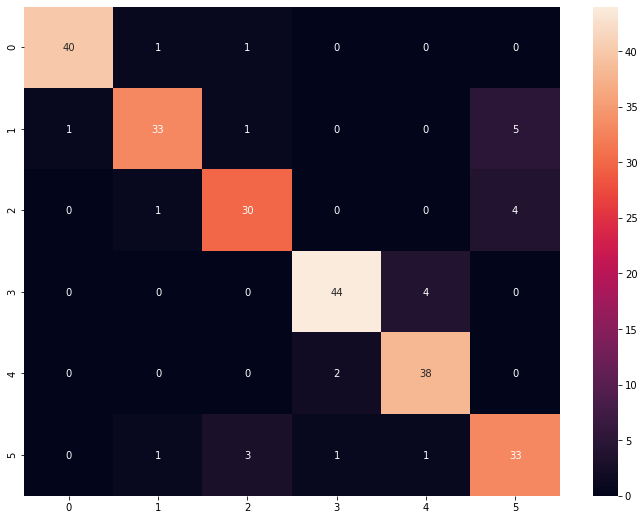

In [117]:
plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True)
plt.show()

**Classification Report**

In [116]:
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.92      0.82      0.87        40
           2       0.86      0.86      0.86        35
           3       0.94      0.92      0.93        48
           4       0.88      0.95      0.92        40
           5       0.79      0.85      0.81        39

    accuracy                           0.89       244
   macro avg       0.89      0.89      0.89       244
weighted avg       0.90      0.89      0.89       244



**CNN Score**

In [83]:
nn_model.evaluate(x_test, y_test)

8/8 [==============================] - 1s 149ms/step - loss: 0.2944 - acc: 0.8934


[0.294440358877182, 0.8934426307678223]

# Evaluation

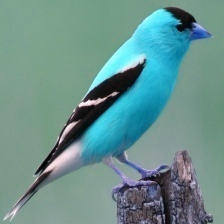

In [85]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

In [86]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  AMERICAN GOLDFINCH
Predicted :  AMERICAN GOLDFINCH
